In [9]:
import scipy.optimize
import math
import numpy as np
from pybetacool import PyBetaCool

#unofficial Betacool: https://github.com/dgamba/betacool
obj = PyBetaCool(BLDfilename='/home/pkruyt/cernbox/BETACOOL_ecooling/benchmarking-Betacool/LEIR.bld', betacoolExec='/home/pkruyt/cernbox/BETACOOL_ecooling/betacool/Betacool_Linux')
# Edit one parameter (row=60, 5th value is "Transverse temperature, eV")
# Execute Betacool
obj.runBetacool('/f')

BETACOOL----------release ver.7.2.beta (omp)----------2023/6/23
/home/pkruyt/cernbox/BETACOOL_ecooling/betacool/Betacool_Linux /home/pkruyt/cernbox/BETACOOL_ecooling/benchmarking-Betacool/LEIR.bld /f
Input parameter [12,11] was initialised with default value:1e+10
Cannot open file : Bring3.bump
Mean beam radius= 0.1370049566  is more than chamber 4
Mean beam radius= 0.1370049566  is more than chamber 4
FINISH: 2023/6/23-16:53:37



False

In [10]:
# Parse some output file
data = obj.parseCurveFile('flong.cur')


TODO: simple version here...


TODO: simple version here...


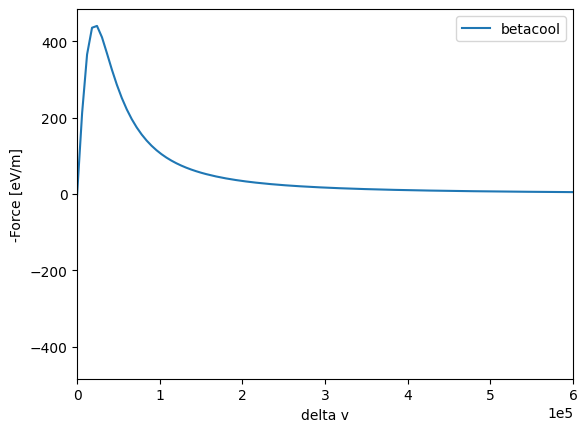

In [11]:
tmp = obj.parseCurveFile('flong.cur')
#tmp = tmp.transpose()

#remove Nan
#nan_mask = np.isnan(tmp).any(axis=1)  # create boolean mask of rows with NaN values
#tmp = tmp[~nan_mask]  # extract rows without any NaN values
tmp = tmp[:(100000)]

import matplotlib.pyplot as plt

v_diff=tmp[:, 0]
force=tmp[:,1]
# plot the data points
#plt.plot(tmp[:, 0], tmp[:, 1], label='betacool')
plt.plot(v_diff,-force, label='betacool')


# add labels and legend
plt.xlabel('delta v')
plt.ylabel('-Force [eV/m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.xlim([0,6e5])
#plt.ylim([0,1550])

# show the plot
plt.show()


In [12]:
# np.save('../force_betacool.npy', tmp)


np.savez('../force_betacool.npz', v_diff=v_diff, force=force)
